# Лабораторная работа №3
## Обработка бинарных изображений. Морфология.

1. Создать средствами OpenCV бинарное изображение с простым рисунком.
  *   Русунок из простых фигур: квадрат, круг и т.д.
2. Зашумить изображение импульсным шумом с вероятностью p (по вариантам).
  *   Вход: изображение из пункта 1
  *   Вывод: зашумленное изображение
3. Написать функции реализации эрозии и дилатации 

> Функции вида fun(Image, struct)  
Где struct  - структурный элемент в виде матрицы 

4. Выполнить операции эрозии и дилатации для зашумленного изображения со структурным элементом заданным по вариантам.
  *   Вход: изображение из пункта 2
  *   Вывод: Исходное (из пункта 1), зашумленное (из пункта 2) и  изображения после эрозии и дилатации.
5. Отфильтровать зашумленное изображение при помощи морфологических операций вскрытия и закрытия (структурный элемент задан по вариантам).  
Подсчитать коэффициент шума для результа фильтрации.
  *   Вход: изображение из пункта 2
  *   Вывод:  исходное (из пункта 1), зашумленное (из пункта 2) и  изображения после вскрытия и закрытия. Коэффициент шума.
  *   Коэффициент шума считать как количество несовпавших пикселей между отфильтрованным изображением и исходным (не зашумленным) из пункта 1.

6. Отфильтровать изображение при помощи логического фильтра. Подсчитать коэффициент шума для результа фильтрации.
  *   Вход: изображение из пункта 2
  *   Вывод: исходное (из пункта 1), зашумленное (из пункта 2) и отфильтрованное изображение. Коэффициент шума.
  *   Коэффициент шума считать как количество несовпавших пикселей между отфильтрованным изображением и исходным (не зашумленным) из пункта 1.
  *   Таблица логического фильтра в лекции слайд 17.

7. На исходном изображении  с помощью морфологических операций выделить контур объекта. Выяснить, когда контур получается внешним, внутренним, четырёхсвязным, восьмисвязным.
  *   Вход: изображение из пункта 1
  *   Вывод: исходное изображение, изображение с выделенными контурами.

8. На исходном изображении  с помощью морфологических операций выделить горизонтальные и вертикальные контуры объекта. 
  *   Вход: изображение из пункта 1
  *   Вывод: исходное изображение, изображение с выделенными горизонтальными контурами, изображение с выделенными вертикальными контурами.

  
    
    
*Для работы с изображением использовать OpenCV (открытие, сохранение и т.д.). Для визуализации можно использовать matplotlib. Все необходимые для задания функции реализовавать самим, а не использовать готовые в OpenCV, если не указано обратного.*
  
  
  

---



> Позже добавлю полезные ссылки по материалу.  
По всем вопросам писать в ЛС в дискорде



Ссылки на полезные ресурсы:

1.    [Документация OpenCV](https://docs.opencv.org/4.x/index.html)



# Варианты задания


№ варианта | Вероятность p | Вид структурного элемента 
--- | :---: | :---: 
2 | 0,15 | квадрат 3×3



Импорт необходимых библиотек

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import itertools

1. Создать средствами OpenCV бинарное изображение с простым рисунком.
  *   Русунок из простых фигур: квадрат, круг и т.д.


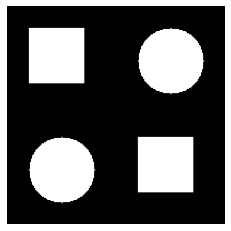

In [2]:
IMAGE_HEIGHT, IMAGE_WIDTH = 200, 200
image = np.full(shape=(IMAGE_HEIGHT, IMAGE_WIDTH), fill_value=0)

cv2.circle(image, center=(150, 50), radius=30, color=(1, 1, 1), thickness = -1)
cv2.circle(image, center=(50, 150), radius=30, color=(1, 1, 1), thickness = -1)
cv2.rectangle(image, pt1=(70, 70), pt2=(20, 20), color=(1, 1, 1), thickness = -1)
cv2.rectangle(image, pt1=(170, 170), pt2=(120, 120), color=(1, 1, 1), thickness = -1)

plt.axis("off")
plt.imshow(image, cmap='gray') # отображение 

2. Зашумить изображение импульсным шумом с вероятностью p (по вариантам).
  *   Вход: изображение из пункта 1
  *   Вывод: зашумленное изображение


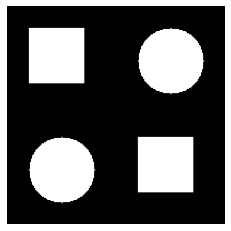

In [3]:
plt.axis("off")
plt.imshow(image, cmap='gray') # отображение 

(-0.5, 199.5, 199.5, -0.5)

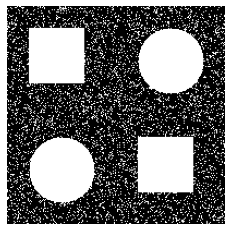

In [4]:
def sp(image: np.ndarray, part: float = 0.15) -> np.ndarray:
    rows, cols = image.shape
    output = image.copy()
    for noise_pixel in [pixel for pixel in list(itertools.product(range(rows), range(cols))) if np.random.random() <= part]:
        output[noise_pixel[0], noise_pixel[1]] = 1
    return output

image1 = sp(image)
plt.imshow(image1, cmap='gray')
plt.axis("off")

3. Написать функции реализации эрозии и дилатации 

> Функции вида fun(Image, struct)  
Где struct  - структурный элемент в виде матрицы 



In [5]:
def erosian(image: np.ndarray, kernal: np.ndarray) -> np.ndarray:
    y = kernal.shape[0] // 2
    x = kernal.shape[1] // 2
    processed_image = np.copy(image)
    for i in range(y, image.shape[0] - y):
        for j in range(x, image.shape[1] - x):
            local_window = image[i-y:i+y+1, j-x:j+x+1]
            processed_image[i][j] = np.min(local_window[kernal])
    return processed_image 

def dilate(img: np.ndarray, kernal: np.ndarray) -> np.ndarray:
    y = kernal.shape[0] // 2
    x = kernal.shape[1] // 2
    processed_image = np.copy(img)
    for i in range(y, img.shape[0] - y):
        for j in range(x, img.shape[1] - x):
            local_window = img[i-y:i+y+1, j-x:j+x+1]
            processed_image[i][j] = np.max(local_window[kernal])
    return processed_image 

4. Выполнить операции эрозии и дилатации для зашумленного изображения со структурным элементом заданным по вариантам.
  *   Вход: изображение из пункта 2
  *   Вывод: Исходное (из пункта 1), зашумленное (из пункта 2) и  изображения после эрозии и дилатации.


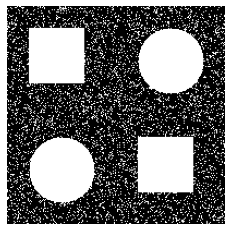

In [6]:
plt.axis("off")
plt.imshow(image1, cmap='gray')

In [7]:
structs = np.ones((3,3), dtype=bool)
# structs = np.array([
#     [1, 1, 1],
#     [1, 1, 1],
#     [1, 1, 1],
# ])

In [8]:
def opening(image1: np.ndarray, kernal: np.ndarray) -> np.ndarray:
    temp = erosian(image1, kernal)
    output = dilate(temp, kernal)
    return output

def closing(image1: np.ndarray, kernal: np.ndarray) -> np.ndarray:
    temp = dilate(image1, kernal)
    output = erosian(temp, kernal)
    return output

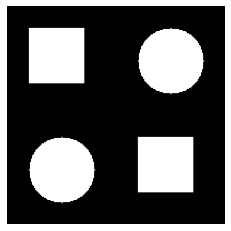

In [9]:
plt.axis("off")
plt.imshow(image, cmap='gray') # отображение

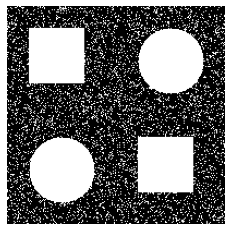

In [10]:
plt.axis("off")
plt.imshow(image1, cmap='gray')

In [11]:
def noise_factor(image_1: np.ndarray, image_2: np.ndarray) -> int:
    return np.sum(image_1 != image_2)/40000

Коэффициент шума: 0.024375


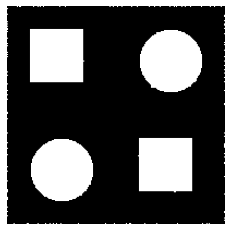

In [12]:
erosian_rect3 = erosian(image1, structs)
print(f"Коэффициент шума: {noise_factor(image, erosian_rect3)}")
plt.axis("off")
plt.imshow(erosian_rect3, cmap='gray')

Коэффициент шума: 0.5493


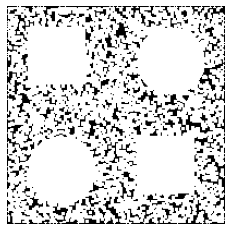

In [13]:
dilate_rect3 = dilate(image1, structs)
print(f"Коэффициент шума: {noise_factor(image, dilate_rect3)}")
plt.axis("off")
plt.imshow(dilate_rect3, cmap='gray')

5. Отфильтровать зашумленное изображение при помощи морфологических операций вскрытия и закрытия (структурный элемент задан по вариантам).  
Подсчитать коэффициент шума для результа фильтрации.
  *   Вход: изображение из пункта 2
  *   Вывод:  исходное (из пункта 1), зашумленное (из пункта 2) и  изображения после вскрытия и закрытия. Коэффициент шума.
  *   Коэффициент шума считать как количество несовпавших пикселей между отфильтрованным изображением и исходным (не зашумленным) из пункта 1.

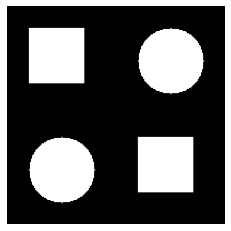

In [14]:
plt.axis("off")
plt.imshow(image, cmap='gray') # отображение 

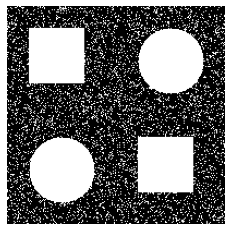

In [15]:
plt.axis("off")
plt.imshow(image1, cmap='gray') # отображение 

Коэффициент шума: 0.0121


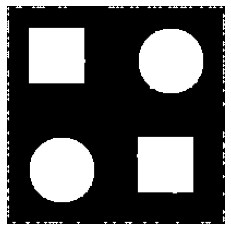

In [16]:
opening_rect3 = opening(image1, structs)
print(f"Коэффициент шума: {noise_factor(image, opening_rect3)}")
plt.axis("off")
plt.imshow(opening_rect3, cmap='gray')

Коэффициент шума: 0.262025


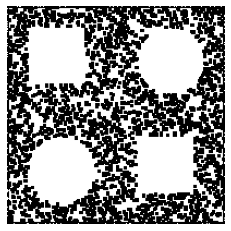

In [17]:
closing_rect3 = closing(image1, structs)
print(f"Коэффициент шума: {noise_factor(image, closing_rect3)}")
plt.axis("off")
plt.imshow(closing_rect3, cmap='gray')

6. Отфильтровать изображение при помощи логического фильтра. Подсчитать коэффициент шума для результа фильтрации.
  *   Вход: изображение из пункта 2
  *   Вывод: исходное (из пункта 1), зашумленное (из пункта 2) и отфильтрованное изображение. Коэффициент шума.
  *   Коэффициент шума считать как количество несовпавших пикселей между отфильтрованным изображением и исходным (не зашумленным) из пункта 1.
  *   Таблица логического фильтра в лекции слайд 17.



In [18]:
def tableFilter(image1: np.ndarray, kernel: np.ndarray)->np.ndarray:
    x, y = kernel.shape[0] // 2, kernel.shape[1] // 2
    output = image1.copy()
    for i in range(y, image1.shape[0] - y):
        for j in range(x, image1.shape[1] - x):
            local_window = image1[i-y:i+y+1, j-x:j+x+1]
            temp = local_window[kernel]
            output[i][j] = np.max([temp[0],temp[1],temp[2],temp[3]]) if temp[2].all() else np.min([temp[0],temp[1],temp[2],temp[3]])
    return output

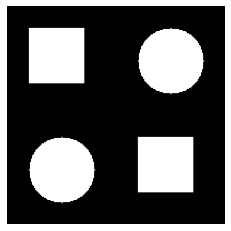

In [19]:
plt.axis("off")
plt.imshow(image, cmap='gray') # отображение 

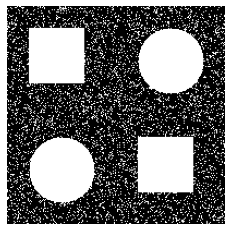

In [20]:
plt.axis("off")
plt.imshow(image1, cmap='gray') # отображение 

Коэффициент шума: 0.125125


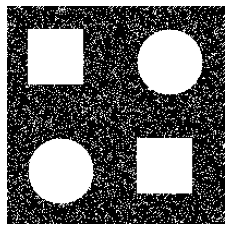

In [21]:
tableFilter_rect3 = tableFilter(image1, structs)
print(f"Коэффициент шума: {noise_factor(image, tableFilter_rect3)}")
plt.axis("off")
plt.imshow(tableFilter_rect3, cmap='gray')

7. На исходном изображении  с помощью морфологических операций выделить контур объекта. Выяснить, когда контур получается внешним, внутренним, четырёхсвязным, восьмисвязным.
  *   Вход: изображение из пункта 1
  *   Вывод: исходное изображение, изображение с выделенными контурами.



Четырехсвязным называется фильтр, в которой от каждого пикселя можно «добраться» до любого другого, переходя от пикселя к пикселю в двух горизонтальных и двух вертикальных направлениях, т.е. вправо, влево, вверх и вниз. В восьмисвязном фильтре это же можно сделать, добавив к указанным направлениям переходов еще четыре диагональных: вправо и вверх, вправо и вниз, влево и вверх, влево и вниз. Отметим также то, что граница четырехсвязного фильтра является восьмисвязной, а граница восьмисвязного фильтра – четырехсвязной.

Выделить внутренний контур объекта можно, взяв сумму по модулю 2 результирующего изображения после операции эрозии исходного изображения с исходным изображением.

Выделить внешний контур объекта можно, взяв сумму по модулю 2 результирующего изображения после операции дилатации исходного изображения с исходным изображением.


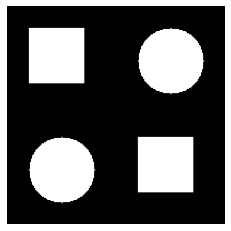

In [22]:
plt.axis("off")
plt.imshow(image, cmap='gray')

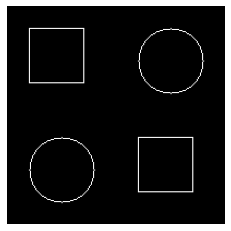

In [23]:
#Восьмисвязный внутренний контур
structs2 = np.array([[False,True,False],[True,True,True],[False,True,False]], dtype=bool)
plt.axis("off")
plt.imshow((image + erosian(image, structs2)) % 2, cmap='gray')

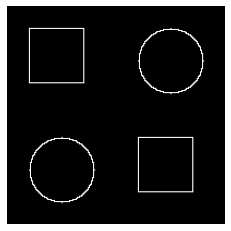

In [24]:
#Четырехсвязный внутренний контур
plt.axis("off")
plt.imshow((image + erosian(image, structs)) % 2, cmap='gray')

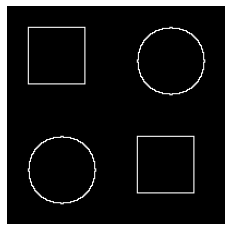

In [25]:
#Четырехсвязный внешний контур
plt.axis("off")
plt.imshow((image + dilate(image, structs)) % 2, cmap='gray')

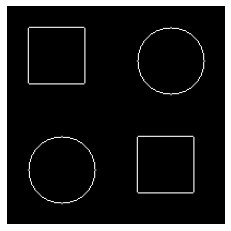

In [26]:
#Восьмисвязный внешний контур
plt.axis("off")
plt.imshow((image + dilate(image, structs2)) % 2, cmap='gray')

8. На исходном изображении  с помощью морфологических операций выделить горизонтальные и вертикальные контуры объекта. 
  *   Вход: изображение из пункта 1
  *   Вывод: исходное изображение, изображение с выделенными горизонтальными контурами, изображение с выделенными вертикальными контурами.

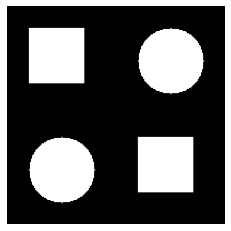

In [27]:
plt.axis("off")
plt.imshow(image, cmap='gray')

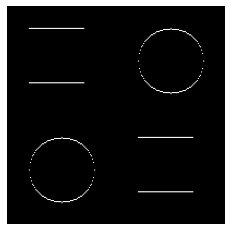

In [28]:
plt.axis("off")
plt.imshow(image ^ erosian(image, np.array([[True],[True],[True]])), cmap='gray')

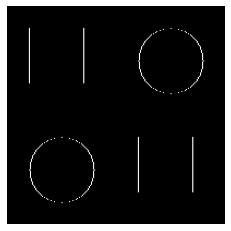

In [29]:
plt.axis("off")
plt.imshow(image ^ erosian(image, np.array([[True,True,True]])), cmap='gray')